In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import r2_score
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import seaborn as sns
from itertools import combinations
from statannotations.Annotator import Annotator
import contextily as ctx
from mpl_toolkits.axes_grid1 import make_axes_locatable

/usr/local/lib/python3.9/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


# Load Data

### American Community Survey - Census Tracts
-race/ethcnicity
-income
-age (not included)
-industry (not included)
-education (not included)
-income brackets (not included)
-household type (not included)
-own or rent (not included)
-distribution of car ownership (not included)
-commute time



In [2]:
#Load ACS Census Tract Data -- Race
race_tracts = pd.read_csv("ACSDP5Y2019.DP05_2021-03-14T133105/ACSDP5Y2019.DP05_data_with_overlays_2021-03-11T145206.csv")
race_tracts = race_tracts.drop([0])
race_tracts = race_tracts.replace("-",np.nan)
race_tracts = race_tracts.replace("(X)",np.nan)

pct_race_tracts = pd.DataFrame(index = race_tracts.index, columns = ["White_pct","Black_pct","Native_pct","Asian_pct","Pac Islander_pct","Two or More_pct","Latino_pct", "White non-Latino_pct","Black non-Latino_pct", "Asian non-Latino_pct"])
pct_race_tracts.loc[:,"White_pct"] = race_tracts.loc[:,"DP05_0037PE"].astype(float)
pct_race_tracts.loc[:,"Black_pct"] = race_tracts.loc[:,"DP05_0038PE"].astype(float)
pct_race_tracts.loc[:,"Native_pct"] = race_tracts.loc[:,"DP05_0039PE"].astype(float)
pct_race_tracts.loc[:,"Asian_pct"] = race_tracts.loc[:,"DP05_0044PE"].astype(float)
pct_race_tracts.loc[:,"Pac Islander_pct"] = race_tracts.loc[:,"DP05_0052PE"].astype(float)
pct_race_tracts.loc[:,"Two or More_pct"] = race_tracts.loc[:,"DP05_0058PE"].astype(float)
pct_race_tracts.loc[:,"Latino_pct"] = race_tracts.loc[:,"DP05_0071PE"].astype(float)
pct_race_tracts.loc[:,"White non-Latino_pct"] = race_tracts.loc[:,"DP05_0077PE"].astype(float)
pct_race_tracts.loc[:,"Black non-Latino_pct"] = race_tracts.loc[:,"DP05_0078PE"].astype(float)
pct_race_tracts.loc[:,"Asian non-Latino_pct"] = race_tracts.loc[:,"DP05_0080PE"].astype(float)
pct_race_tracts["GEOID"] = race_tracts.loc[:,"GEO_ID"].str[9:]

total_race_tracts = pd.DataFrame(index = race_tracts.index, columns = ["White","Black","Native","Asian","Pac Islander","Two or More","Latino", "White non-Latino","Black non-Latino_pct", "Asian non-Latino_pct"])
total_race_tracts.loc[:,"White"] = race_tracts.loc[:,"DP05_0037E"].astype(float)
total_race_tracts.loc[:,"Black"] = race_tracts.loc[:,"DP05_0038E"].astype(float)
total_race_tracts.loc[:,"Native"] = race_tracts.loc[:,"DP05_0039E"].astype(float)
total_race_tracts.loc[:,"Asian"] = race_tracts.loc[:,"DP05_0044E"].astype(float)
total_race_tracts.loc[:,"Pac Islander"] = race_tracts.loc[:,"DP05_0052E"].astype(float)
total_race_tracts.loc[:,"Two or More"] = race_tracts.loc[:,"DP05_0058E"].astype(float)
total_race_tracts.loc[:,"Latino"] = race_tracts.loc[:,"DP05_0071E"].astype(float)
total_race_tracts.loc[:,"White non-Latino"] = race_tracts.loc[:,"DP05_0077E"].astype(float)
total_race_tracts.loc[:,"Black non-Latino"] = race_tracts.loc[:,"DP05_0078E"].astype(float)
total_race_tracts.loc[:,"Black non-Latino"] = race_tracts.loc[:,"DP05_0080E"].astype(float)
total_race_tracts["GEOID"] = race_tracts.loc[:,"GEO_ID"].str[9:]

total_pop_tracts = pd.DataFrame(index = race_tracts.index, columns = ["Total Population"])
total_pop_tracts.loc[:,"Total Population"] = race_tracts.loc[:,"DP05_0033E"].astype(float)
total_pop_tracts["GEOID"] = race_tracts.loc[:,"GEO_ID"].str[9:]

total_asian_tracts = pd.DataFrame(index = race_tracts.index, columns = ["Indian","Chinese","Filipino","Japanese","Korean","Vietnamese","Other Asian "])
total_asian_tracts.loc[:,"Indian"] = race_tracts.loc[:,"DP05_0045E"].astype(float)
total_asian_tracts.loc[:,"Chinese"] = race_tracts.loc[:,"DP05_0046E"].astype(float)
total_asian_tracts.loc[:,"Filipino"] = race_tracts.loc[:,"DP05_0047E"].astype(float)
total_asian_tracts.loc[:,"Japanese"] = race_tracts.loc[:,"DP05_0048E"].astype(float)
total_asian_tracts.loc[:,"Korean"] = race_tracts.loc[:,"DP05_0049E"].astype(float)
total_asian_tracts.loc[:,"Vietnamese"] = race_tracts.loc[:,"DP05_0050E"].astype(float)
total_asian_tracts.loc[:,"Other Asian"] = race_tracts.loc[:,"DP05_0051E"].astype(float)
total_asian_tracts["GEOID"] = race_tracts.loc[:,"GEO_ID"].str[9:]

pct_asian_tracts = pd.DataFrame(index = race_tracts.index, columns = ["Indian","Chinese","Filipino","Japanese","Korean","Vietnamese","Other Asian"])
pct_asian_tracts.loc[:,"Indian"] = race_tracts.loc[:,"DP05_0045PE"].astype(float)
pct_asian_tracts.loc[:,"Chinese"] = race_tracts.loc[:,"DP05_0046PE"].astype(float)
pct_asian_tracts.loc[:,"Filipino"] = race_tracts.loc[:,"DP05_0047PE"].astype(float)
pct_asian_tracts.loc[:,"Japanese"] = race_tracts.loc[:,"DP05_0048PE"].astype(float)
pct_asian_tracts.loc[:,"Korean"] = race_tracts.loc[:,"DP05_0049PE"].astype(float)
pct_asian_tracts.loc[:,"Vietnamese"] = race_tracts.loc[:,"DP05_0050PE"].astype(float)
pct_asian_tracts.loc[:,"Other Asian"] = race_tracts.loc[:,"DP05_0051E"].astype(float)
pct_asian_tracts["GEOID"] = race_tracts.loc[:,"GEO_ID"].str[9:]



total_latino_tracts = pd.DataFrame(index = race_tracts.index, columns = ["Mexican","Puerto Rican","Cuban","Other Latino"])
total_latino_tracts.loc[:,"Mexican"] = race_tracts.loc[:,"DP05_0072E"].astype(float)
total_latino_tracts.loc[:,"Puerto Rican"] = race_tracts.loc[:,"DP05_0073E"].astype(float)
total_latino_tracts.loc[:,"Cuban"] = race_tracts.loc[:,"DP05_0074E"].astype(float)
total_latino_tracts.loc[:,"Other Latino"] = race_tracts.loc[:,"DP05_0075E"].astype(float)
total_latino_tracts["GEOID"] = race_tracts.loc[:,"GEO_ID"].str[9:]

pct_latino_tracts = pd.DataFrame(index = race_tracts.index, columns = ["Mexican","Puerto Rican","Cuban","Other Latino"])
pct_latino_tracts.loc[:,"Mexican"] = race_tracts.loc[:,"DP05_0072PE"].astype(float)
pct_latino_tracts.loc[:,"Puerto Rican"] = race_tracts.loc[:,"DP05_0073PE"].astype(float)
pct_latino_tracts.loc[:,"Cuban"] = race_tracts.loc[:,"DP05_0074PE"].astype(float)
pct_latino_tracts.loc[:,"Other Latino"] = race_tracts.loc[:,"DP05_0075PE"].astype(float)
pct_latino_tracts["GEOID"] = race_tracts.loc[:,"GEO_ID"].str[9:]




/var/folders/vy/0842xjfx7l38y0jjvdqx_6sc0000gn/T/ipykernel_66859/2901318140.py:2: DtypeWarning: Columns (2,3,4,6,7,10,11,18,19,22,23,26,27,30,31,34,35,38,39,42,43,46,47,50,51,54,55,58,59,62,63,66,67,74,75,78,79,82,83,86,87,90,91,94,95,98,99,100,102,103,106,107,114,115,116,118,119,122,123,130,131,132,134,135,138,139,142,143,146,147,150,151,154,155,158,159,162,163,166,167,170,171,174,175,178,179,182,183,186,187,190,191,194,195,198,199,202,203,206,207,210,211,214,215,218,219,222,223,226,227,230,231,234,235,238,239,242,243,246,247,250,251,252,254,255,258,259,262,263,266,267,270,271,274,275,278,279,280,282,283,286,287,290,291,294,295,298,299,302,303,306,307,310,311,314,315,318,319,322,323,326,327,330,331,334,335,338,339,342,343,346,347,348,350,351,354,355) have mixed types. Specify dtype option on import or set low_memory=False.
  race_tracts = pd.read_csv("ACSDP5Y2019.DP05_2021-03-14T133105/ACSDP5Y2019.DP05_data_with_overlays_2021-03-11T145206.csv")


In [3]:
#Age -- uses same table as race/ethnicity
age_pct_tracts = pd.DataFrame(index = race_tracts.index,columns = ["median","over_65"])
age_pct_tracts.loc[:,"median"] = race_tracts.loc[:,"DP05_0018PE"].astype(float)
age_pct_tracts.loc[:,"over_65"] = race_tracts.loc[:,"DP05_0024PE"].astype(float)

In [4]:
#Income
income = pd.read_csv("ACSST5Y2019.S1903_2021-04-15T123259/ACSST5Y2019.S1903_data_with_overlays_2021-04-15T123246.csv")
income = income.drop([0])

#Prepare Income Data
income = income.replace("-",np.nan)
income = income.replace("250,000+",250000)
income = income.replace("2,500-", 2500)
income_df = pd.DataFrame(index = income.index, columns = ["median income"])
# median household income (overall): S1903_C03_001E
income_df.loc[:,"median income"] = income.loc[:,"S1903_C03_001E"].astype(float)
income_df["white_median"] = income.loc[:,"S1903_C03_002E"].astype(float)
income_df["black_median"] = income.loc[:,"S1903_C03_003E"].astype(float)
income_df["native_median"] = income.loc[:,"S1903_C03_004E"].astype(float)
income_df["asian_median"] = income.loc[:,"S1903_C03_005E"].astype(float)
income_df["latino_median"] = income.loc[:,"S1903_C03_009E"].astype(float)
income_df.loc[:,"GEOID"] = income.loc[:,"GEO_ID"].str[9:]

/var/folders/vy/0842xjfx7l38y0jjvdqx_6sc0000gn/T/ipykernel_66859/3962942079.py:2: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,110,111,148,149) have mixed types. Specify dtype option on import or set low_memory=False.
  income = pd.read_csv("ACSST5Y2019.S1903_2021-04-15T123259/ACSST5Y2019.S1903_data_with_overlays_2021-04-15T123246.csv")


In [5]:
#Transportation
transport = pd.read_csv("ACSST5Y2019.S0802_2021-03-03T123306/ACSST5Y2019.S0802_data_with_overlays_2021-03-03T123302.csv")
transport = transport.drop([0])
transport = transport.replace("-",np.nan)

no_vehicles = pd.DataFrame(index = transport.index, columns = ["Total Workers","No Vehicle","Pct No Vehicle"])
no_vehicles.loc[:,"Total Workers"] = transport.loc[:,"S0802_C01_001E"].astype(float)
no_vehicles.loc[:,"No Vehicle"] = transport.loc[:,"S0802_C01_094E"].astype(float)
no_vehicles.loc[:,"Pct No Vehicle"] = no_vehicles.loc[:,"No Vehicle"]/no_vehicles.loc[:,"Total Workers"]*100

#Total driving a car, truck, van alone: S0802_C02_001E
#Total carpooling: S0802_C03_001E
#Total public transit: S0802_C04_001E
transportation_means = pd.DataFrame(index = transport.index, columns = ["GEOID","Total Workers","Car alone","Carpool","Public Transit","Pct alone","Pct carpool","Pct transit"])
transportation_means.loc[:,"GEOID"] = transport.loc[:,"GEO_ID"].str[9:]
transportation_means.loc[:,"Total Workers"] = transport.loc[:,"S0802_C01_001E"].astype(float)
transportation_means.loc[:,"Car alone"] = transport.loc[:,"S0802_C02_001E"].astype(float)
transportation_means.loc[:,"Carpool"] = transport.loc[:,"S0802_C03_001E"].astype(float)
transportation_means.loc[:,"Public Transit"] = transport.loc[:,"S0802_C04_001E"].astype(float)
transportation_means.loc[:,"Pct alone"] = transportation_means.loc[:,"Car alone"]/transportation_means.loc[:,"Total Workers"]*100
transportation_means.loc[:,"Pct carpool"] = transportation_means.loc[:,"Carpool"]/transportation_means.loc[:,"Total Workers"]*100
transportation_means.loc[:,"Pct transit"] = transportation_means.loc[:,"Public Transit"]/transportation_means.loc[:,"Total Workers"]*100


#commute time
time_work = pd.DataFrame(index = transport.index, columns = ["GEOID","Total","<15","15-29","30-44","45-59","60+"])
time_work.loc[:,"GEOID"] = transport.loc[:,"GEO_ID"].str[9:]
time_work.loc[:,"<15"] = transport.loc[:,"S0802_C01_081E"].astype(float)+transport.loc[:,"S0802_C01_082E"].astype(float)
time_work.loc[:,"15-29"] = transport.loc[:,"S0802_C01_083E"].astype(float)+transport.loc[:,"S0802_C01_084E"].astype(float)+transport.loc[:,"S0802_C01_085E"].astype(float)
time_work.loc[:,"30-44"] = transport.loc[:,"S0802_C01_086E"].astype(float)+transport.loc[:,"S0802_C01_087E"].astype(float)
time_work.loc[:,"45-59"] = transport.loc[:,"S0802_C01_088E"].astype(float)
time_work.loc[:,"60+"] =  transport.loc[:,"S0802_C01_089E"].astype(float)
time_work.loc[:,"Total"] = transport.loc[:,"S0802_C01_070E"].astype(float)
time_work["pct_<15"] = time_work["<15"]/time_work["Total"]*100
time_work["pct_15-29"] = time_work["15-29"]/time_work["Total"]*100
time_work["pct_30-44"] = time_work["30-44"]/time_work["Total"]*100
time_work["pct_45-59"] = time_work["45-59"]/time_work["Total"]*100
time_work["pct_60+"] = time_work["60+"]/time_work["Total"]*100

In [6]:
#Work industry
work_industry = pd.read_csv("ACSST5Y2019.S2405_2021-03-03T125537/ACSST5Y2019.S2405_data_with_overlays_2021-03-03T125534.csv")
work_industry = work_industry.drop([0])
work_industry = work_industry.replace("-",np.nan)
industry_df = pd.DataFrame(index = work_industry.index, columns = ["total","agriculture"])
industry_df.loc[:,"agriculture"] = work_industry.loc[:,"S2405_C01_002E"].astype(float)
industry_df.loc[:,"total"] = work_industry.loc[:,"S2405_C01_001E"].astype(float)
industry_df["pct_agriculture"] = industry_df["agriculture"]/industry_df["total"]*100
industry_df.loc[:,"GEOID"] = work_industry.loc[:,"GEO_ID"].str[9:]

### American Community Survey - ZIP Codes

In [7]:
#Load ACS Census Tract Data -- Race
race_ZIP = pd.read_csv("ZCTA_census_data/ACSDP5Y2019.DP05_2022-04-14T184930/ACSDP5Y2019.DP05_data_with_overlays_2021-11-16T165905.csv")
race_ZIP = race_ZIP.drop([0])
race_ZIP = race_ZIP.replace("-",np.nan)

pct_race_ZIP = pd.DataFrame(index = race_ZIP.index, columns = ["White_pct","Black_pct","Native_pct","Asian_pct","Pac Islander_pct","Two or More_pct","Latino_pct", "White non-Latino_pct","Black non-Latino_pct", "Asian non-Latino_pct"])
pct_race_ZIP.loc[:,"White_pct"] = race_ZIP.loc[:,"DP05_0037PE"].astype(float)
pct_race_ZIP.loc[:,"Black_pct"] = race_ZIP.loc[:,"DP05_0038PE"].astype(float)
pct_race_ZIP.loc[:,"Native_pct"] = race_ZIP.loc[:,"DP05_0039PE"].astype(float)
pct_race_ZIP.loc[:,"Asian_pct"] = race_ZIP.loc[:,"DP05_0044PE"].astype(float)
pct_race_ZIP.loc[:,"Pac Islander_pct"] = race_ZIP.loc[:,"DP05_0052PE"].astype(float)
pct_race_ZIP.loc[:,"Two or More_pct"] = race_ZIP.loc[:,"DP05_0058PE"].astype(float)
pct_race_ZIP.loc[:,"Latino_pct"] = race_ZIP.loc[:,"DP05_0071PE"].astype(float)
pct_race_ZIP.loc[:,"White non-Latino_pct"] = race_ZIP.loc[:,"DP05_0077PE"].astype(float)
pct_race_ZIP.loc[:,"Black non-Latino_pct"] = race_ZIP.loc[:,"DP05_0078PE"].astype(float)
pct_race_ZIP.loc[:,"Asian non-Latino_pct"] = race_ZIP.loc[:,"DP05_0080PE"].astype(float)
pct_race_ZIP["GEOID"] = race_ZIP.loc[:,"GEO_ID"].str[9:].astype(int)

total_race_ZIP = pd.DataFrame(index = race_ZIP.index, columns = ["White","Black","Native","Asian","Pac Islander","Two or More","Latino", "White non-Latino","Black non-Latino", "Asian non-Latino"])
total_race_ZIP.loc[:,"White"] = race_ZIP.loc[:,"DP05_0037E"].astype(float)
total_race_ZIP.loc[:,"Black"] = race_ZIP.loc[:,"DP05_0038E"].astype(float)
total_race_ZIP.loc[:,"Native"] = race_ZIP.loc[:,"DP05_0039E"].astype(float)
total_race_ZIP.loc[:,"Asian"] = race_ZIP.loc[:,"DP05_0044E"].astype(float)
total_race_ZIP.loc[:,"Pac Islander"] = race_ZIP.loc[:,"DP05_0052E"].astype(float)
total_race_ZIP.loc[:,"Two or More"] = race_ZIP.loc[:,"DP05_0058E"].astype(float)
total_race_ZIP.loc[:,"Latino"] = race_ZIP.loc[:,"DP05_0071E"].astype(float)
total_race_ZIP.loc[:,"White non-Latino"] = race_ZIP.loc[:,"DP05_0077E"].astype(float)
total_race_ZIP.loc[:,"Black non-Latino"] = race_ZIP.loc[:,"DP05_0078E"].astype(float)
total_race_ZIP.loc[:,"Asian non-Latino"] = race_ZIP.loc[:,"DP05_0080E"].astype(float)
total_race_ZIP["GEOID"] = race_ZIP.loc[:,"GEO_ID"].str[9:].astype(int)

total_pop_ZIP = pd.DataFrame(index = race_ZIP.index, columns = ["Total Population"])
total_pop_ZIP.loc[:,"Total Population"] = race_ZIP.loc[:,"DP05_0033E"].astype(float)
total_pop_ZIP["GEOID"] = race_ZIP.loc[:,"GEO_ID"].str[9:].astype(int)

total_asian_ZIP = pd.DataFrame(index = race_ZIP.index, columns = ["Indian","Chinese","Filipino","Japanese","Korean","Vietnamese","Other Asian"])
total_asian_ZIP.loc[:,"Indian"] = race_ZIP.loc[:,"DP05_0045E"].astype(float)
total_asian_ZIP.loc[:,"Chinese"] = race_ZIP.loc[:,"DP05_0046E"].astype(float)
total_asian_ZIP.loc[:,"Filipino"] = race_ZIP.loc[:,"DP05_0047E"].astype(float)
total_asian_ZIP.loc[:,"Japanese"] = race_ZIP.loc[:,"DP05_0048E"].astype(float)
total_asian_ZIP.loc[:,"Korean"] = race_ZIP.loc[:,"DP05_0049E"].astype(float)
total_asian_ZIP.loc[:,"Vietnamese"] = race_ZIP.loc[:,"DP05_0050E"].astype(float)
total_asian_ZIP.loc[:,"Other Asian"] = race_ZIP.loc[:,"DP05_0051E"].astype(float)
total_asian_ZIP["GEOID"] = race_ZIP.loc[:,"GEO_ID"].str[9:].astype(int)

pct_asian_ZIP = pd.DataFrame(index = race_ZIP.index, columns = ["Indian_pct","Chinese_pct","Filipino_pct","Japanese_pct","Korean_pct","Vietnamese_pct","Other Asian_pct"])
pct_asian_ZIP.loc[:,"Indian_pct"] = race_ZIP.loc[:,"DP05_0045PE"].astype(float)
pct_asian_ZIP.loc[:,"Chinese_pct"] = race_ZIP.loc[:,"DP05_0046PE"].astype(float)
pct_asian_ZIP.loc[:,"Filipino_pct"] = race_ZIP.loc[:,"DP05_0047PE"].astype(float)
pct_asian_ZIP.loc[:,"Japanese_pct"] = race_ZIP.loc[:,"DP05_0048PE"].astype(float)
pct_asian_ZIP.loc[:,"Korean_pct"] = race_ZIP.loc[:,"DP05_0049PE"].astype(float)
pct_asian_ZIP.loc[:,"Vietnamese_pct"] = race_ZIP.loc[:,"DP05_0050PE"].astype(float)
pct_asian_ZIP.loc[:,"Other Asian_pct"] = race_ZIP.loc[:,"DP05_0051E"].astype(float)
pct_asian_ZIP["GEOID"] = race_ZIP.loc[:,"GEO_ID"].str[9:].astype(int)



total_latino_ZIP = pd.DataFrame(index = race_ZIP.index, columns = ["Mexican","Puerto Rican","Cuban","Other Latino"])
total_latino_ZIP.loc[:,"Mexican"] = race_ZIP.loc[:,"DP05_0072E"].astype(float)
total_latino_ZIP.loc[:,"Puerto Rican"] = race_ZIP.loc[:,"DP05_0073E"].astype(float)
total_latino_ZIP.loc[:,"Cuban"] = race_ZIP.loc[:,"DP05_0074E"].astype(float)
total_latino_ZIP.loc[:,"Other Latino"] = race_ZIP.loc[:,"DP05_0075E"].astype(float)
total_latino_ZIP["GEOID"] = race_ZIP.loc[:,"GEO_ID"].str[9:].astype(int)

pct_latino_ZIP = pd.DataFrame(index = race_ZIP.index, columns = ["Mexican_pct","Puerto Rican_pct","Cuban_pct","Other Latino_pct"])
pct_latino_ZIP.loc[:,"Mexican_pct"] = race_ZIP.loc[:,"DP05_0072PE"].astype(float)
pct_latino_ZIP.loc[:,"Puerto Rican_pct"] = race_ZIP.loc[:,"DP05_0073PE"].astype(float)
pct_latino_ZIP.loc[:,"Cuban_pct"] = race_ZIP.loc[:,"DP05_0074PE"].astype(float)
pct_latino_ZIP.loc[:,"Other Latino_pct"] = race_ZIP.loc[:,"DP05_0075PE"].astype(float)
pct_latino_ZIP["GEOID"] = race_ZIP.loc[:,"GEO_ID"].str[9:].astype(int)




In [8]:
income_ZIP = pd.read_csv("ZCTA_census_data/ACSST5Y2019.S1903_2022-04-14T185056/ACSST5Y2019.S1903_data_with_overlays_2021-12-13T202605.csv")
income_ZIP = income_ZIP.drop([0])

#Prepare Income Data
income_ZIP = income_ZIP.replace("-",np.nan)
income_ZIP = income_ZIP.replace("250,000+",250000)
income_ZIP = income_ZIP.replace("2,500-", 2500)
income_df_ZIP = pd.DataFrame(index = income_ZIP.index, columns = ["median income"])
# median household income (overall): S1903_C03_001E
income_df_ZIP.loc[:,"median income"] = income_ZIP.loc[:,"S1903_C03_001E"].astype(float)
income_df_ZIP["white_median"] = income_ZIP.loc[:,"S1903_C03_002E"].astype(float)
income_df_ZIP["black_median"] = income_ZIP.loc[:,"S1903_C03_003E"].astype(float)
income_df_ZIP["native_median"] = income_ZIP.loc[:,"S1903_C03_004E"].astype(float)
income_df_ZIP["asian_median"] = income_ZIP.loc[:,"S1903_C03_005E"].astype(float)
income_df_ZIP["latino_median"] = income_ZIP.loc[:,"S1903_C03_009E"].astype(float)
income_df_ZIP.loc[:,"GEOID"] = income_ZIP.loc[:,"GEO_ID"].str[9:].astype(int)

In [9]:
transport_ZIP = pd.read_csv("ZCTA_census_data/ACSST5Y2019.S0802_2022-04-14T185141/ACSST5Y2019.S0802_data_with_overlays_2021-12-08T164414.csv")
transport_ZIP = transport_ZIP.drop([0])
transport_ZIP = transport_ZIP.replace("-",np.nan)

time_work_ZIP = pd.DataFrame(index = transport_ZIP.index, columns = ["GEOID","Total","<15","15-29","30-44","45-59","60+"])
time_work_ZIP.loc[:,"GEOID"] = transport_ZIP.loc[:,"GEO_ID"].str[9:]
time_work_ZIP.loc[:,"<15"] = transport_ZIP.loc[:,"S0802_C01_081E"].astype(float)+transport_ZIP.loc[:,"S0802_C01_082E"].astype(float)
time_work_ZIP.loc[:,"15-29"] = transport_ZIP.loc[:,"S0802_C01_083E"].astype(float)+transport_ZIP.loc[:,"S0802_C01_084E"].astype(float)+transport_ZIP.loc[:,"S0802_C01_085E"].astype(float)
time_work_ZIP.loc[:,"30-44"] = transport_ZIP.loc[:,"S0802_C01_086E"].astype(float)+transport_ZIP.loc[:,"S0802_C01_087E"].astype(float)
time_work_ZIP.loc[:,"45-59"] = transport_ZIP.loc[:,"S0802_C01_088E"].astype(float)
time_work_ZIP.loc[:,"60+"] =  transport_ZIP.loc[:,"S0802_C01_089E"].astype(float)
time_work_ZIP.loc[:,"Total"] = transport_ZIP.loc[:,"S0802_C01_070E"].astype(float)
time_work_ZIP["pct_<15"] = time_work_ZIP["<15"]/time_work_ZIP["Total"]*100
time_work_ZIP["pct_15-29"] = time_work_ZIP["15-29"]/time_work_ZIP["Total"]*100
time_work_ZIP["pct_30-44"] = time_work_ZIP["30-44"]/time_work_ZIP["Total"]*100
time_work_ZIP["pct_45-59"] = time_work_ZIP["45-59"]/time_work_ZIP["Total"]*100
time_work_ZIP["pct_60+"] = time_work_ZIP["60+"]/time_work_ZIP["Total"]*100

/var/folders/vy/0842xjfx7l38y0jjvdqx_6sc0000gn/T/ipykernel_66859/3313310288.py:1: DtypeWarning: Columns (2,3,56,57,76,77,84,85,140,141,182,183,204,205,258,259,278,279,286,287,342,343,384,385,406,407,460,461,480,481,488,489,544,545,586,587,608,609,662,663,682,683,690,691,746,747,788,789) have mixed types. Specify dtype option on import or set low_memory=False.
  transport_ZIP = pd.read_csv("ZCTA_census_data/ACSST5Y2019.S0802_2022-04-14T185141/ACSST5Y2019.S0802_data_with_overlays_2021-12-08T164414.csv")


### California Vehicle Population (From https://www.energy.ca.gov/files/zev-and-infrastructure-stats-data)
Subset of the data for year 2020. 

In [10]:
ca_vehicles = pd.read_csv("CA_vehicles_ts_2020.csv")

In [11]:
ldv = ca_vehicles[ca_vehicles.Duty=="Light"]

In [12]:
ldv_veh_types = ldv.groupby(["Zip Code","Fuel"]).agg({"Vehicles":"sum"}).reset_index()

In [13]:
ldv_veh_types= ldv_veh_types[ldv_veh_types["Zip Code"]!= "OOS"]
ldv_veh_types["Zip Code"] = ldv_veh_types["Zip Code"].astype(int)

## CA Vehicles Time series (From https://www.energy.ca.gov/files/zev-and-infrastructure-stats-data)
Note that this data set is only light duty vehicles

In [14]:
ca_vehicles_timeseries = pd.read_csv("CA_vehicles_timeseries.csv")

In [15]:
ts = ca_vehicles_timeseries.pivot_table(index = ["Data Year","Fuel Type"], columns = "ZIP", values = "Number of Vehicles").T
ts.columns = [str(y)+"_"+f for y,f in ts.columns.to_flat_index()]
ts = ts.fillna(0)

In [16]:
zip_totals = ca_vehicles_timeseries.groupby(["Data Year","ZIP"]).agg({"Number of Vehicles":"sum"}).reset_index()

In [17]:
zip_totals = zip_totals.set_index(["Data Year","ZIP"])

### CVRP (From https://cleanvehiclerebate.org/en/rebate-statistics)

In [18]:
cvrp = pd.read_csv("CVRPStats_6_22.csv")
#For now limit to individual purchasers (not municipalities, etc.)
cvrp = cvrp[cvrp["Consumer Type"] == "Individual"]
cvrp = cvrp[cvrp["Rebate Dollars"] >0]
cvrp['Census Tract'] = cvrp['Census Tract'].astype(str).str.zfill(11)
cvrp["year"] = ("20"+cvrp["Application Date"].str[-2:]).astype(int)
rebates_tracts = cvrp.groupby(["Vehicle Category","year", "Census Tract"]).agg({"ID":"count"}).reset_index().rename(columns = {"ID":"n_rebates"})
rebates_zip = cvrp.groupby(["Vehicle Category","year", "ZIP"]).agg({"ID":"count"}).reset_index().rename(columns = {"ID":"n_rebates"})

### Redlining (From https://dsl.richmond.edu/panorama/redlining/#loc=5/39.1/-94.58&text=downloads)

In [19]:
redlining = gpd.read_file("fullshpfile/shapefile/holc_ad_data.shp")
redlining_ca = redlining[redlining.state == "CA"]

### TIGER/LINE Shapefiles (From https://www.census.gov/geographies/mapping-files/time-series/geo/tiger-line-file.html)

In [20]:
#Imports TigerLine Census Tract Shapefile
census_tracts = gpd.read_file("tl_2019_06_tract/tl_2019_06_tract.shp")
ZCTA = gpd.read_file("tl_2019_us_zcta510/tl_2019_us_zcta510.shp")
ZCTA["ZCTA5CE10"] = ZCTA["ZCTA5CE10"].astype(int)
ZCTA_crosswalk = pd.read_csv("Zip_to_zcta_crosswalk_2020.csv")
ca_zip = pd.read_csv("ca_zip_codes.csv")
Counties = gpd.read_file("tl_2019_us_county/tl_2019_us_county.shp")
Counties["STATEFP"] = pd.to_numeric(Counties["STATEFP"])
Counties["GEOID"] = pd.to_numeric(Counties["GEOID"])
ZCTA_county_crosswalk = pd.read_csv("zcta_county_rel_10.csv")

In [21]:
ZCTA_CA = ZCTA.merge(ZCTA_crosswalk[ZCTA_crosswalk.STATE=="CA"], how = "right", left_on = "ZCTA5CE10", right_on = "ZIP_CODE")

In [22]:
ZCTA_CA = ZCTA_CA[~ZCTA_CA.ZCTA5CE10.isna()]

In [23]:
ZCTA_CA["ZCTA5CE10"] = ZCTA_CA["ZCTA5CE10"].astype(int)

In [24]:
ZCTA_CA = ZCTA_CA.merge(ZCTA_county_crosswalk[["ZCTA5","COUNTY"]], how = "left", left_on = "ZCTA5CE10", right_on = "ZCTA5")

# Organize Data

### Census tract data frame

In [25]:
tracts_data = census_tracts.copy().set_index("GEOID")

In [26]:
#Add rebates data
for y in rebates_tracts.year.unique():
    for v in rebates_tracts["Vehicle Category"].unique():
        label = f"{v}_{y}"
        # print(y,v)
        tracts_data[label] = 0
        tracts = rebates_tracts.loc[(rebates_tracts["Vehicle Category"] == v) & (rebates_tracts["year"]==y) & (rebates_tracts["Census Tract"].isin(tracts_data.index)),"Census Tract"]
        # print(len(tracts)
        # print(len(rebates_tracts.loc[(rebates_tracts["Vehicle Category"] == v) & (rebates_tracts["year"]==y) & (rebates_tracts["Census Tract"].isin(tracts)),"n_rebates"]))
        tracts_data.loc[tracts, label] = rebates_tracts.loc[(rebates_tracts["Vehicle Category"] == v) & (rebates_tracts["year"]==y) & (rebates_tracts["Census Tract"].isin(tracts)),"n_rebates"].values



In [27]:
for v in rebates_tracts["Vehicle Category"].unique():
    tracts_data[f"{v}_total"] = tracts_data.filter(regex = (f'{v}.*')).sum(axis = 1)

In [28]:
#Add race data
tracts_data = tracts_data.merge(pct_race_tracts, how = "left",left_index = True, right_on = "GEOID").set_index("GEOID")

In [29]:
#add total population data
tracts_data = tracts_data.merge(total_pop_tracts, how = "left", left_index = True, right_on = "GEOID").set_index("GEOID")

In [30]:
#add median income data
tracts_data = tracts_data.merge(income_df[["median income","white_median", "black_median","latino_median","asian_median","GEOID"]], how = "left", left_index = True, right_on = "GEOID").set_index("GEOID")

In [31]:
#add specific race percentage data
tracts_data = tracts_data.merge(pct_asian_tracts, how = "left", left_index = True, right_on = "GEOID").set_index("GEOID")
tracts_data = tracts_data.merge(pct_latino_tracts, how = "left", left_index = True, right_on = "GEOID").set_index("GEOID")

In [32]:
tracts_data["BEV_rebates_pc"] = tracts_data["BEV_total"]/tracts_data["Total Population"]
tracts_data["PHEV_rebates_pc"] = tracts_data["PHEV_total"]/tracts_data["Total Population"]
tracts_data["FCEV_rebates_pc"] = tracts_data["FCEV_total"]/tracts_data["Total Population"]
tracts_data["Other_rebates_pc"] = tracts_data["Other_total"]/tracts_data["Total Population"]

### ZIP code data frame

In [33]:
zip_data = ZCTA_CA[["ZCTA5CE10","ZIP_CODE","COUNTY","geometry"]].copy().set_index("ZIP_CODE").rename(columns = {"COUNTY":"COUNTYFP"})

In [34]:
zip_data = zip_data.merge(ldv_veh_types.pivot(index = "Zip Code", columns = "Fuel", values = "Vehicles"), left_index = True, right_index = True, how = "inner")

In [35]:
veh_types = ldv_veh_types.Fuel.unique()
zip_data["total_vehicles"] = zip_data[veh_types].sum(axis = 1)
for v in veh_types:
    zip_data[f"pct_{v}"] = zip_data[v]/zip_data["total_vehicles"]*100
zip_data = zip_data.fillna(0)

In [36]:
zip_data = zip_data.merge(pct_race_ZIP, how = "left", left_on = "ZCTA5CE10", right_on = "GEOID")

In [37]:
zip_data = zip_data.merge(total_race_ZIP, how = "left", left_on = "GEOID", right_on = "GEOID")

In [38]:
zip_data = zip_data.merge(income_df_ZIP, how = "left", left_on = "GEOID", right_on = "GEOID")

In [39]:
zip_data.loc[zip_data.COUNTYFP==97,["ZCTA5CE10", "median income"]].to_csv("sonoma_incomes.csv")

In [40]:
zip_data = zip_data.merge(ts, how = "left", left_on = "ZCTA5CE10", right_index = True)

In [41]:
for i in zip_data.index:
    for c in ts.columns:
        y, f = c.split("_")
        zip_data.loc[i,f"{c}_pct"] = zip_data.loc[i,c]/zip_totals.loc[(int(y),zip_data.loc[i,"ZCTA5CE10"])].item()*100

/usr/local/lib/python3.9/site-packages/geopandas/geodataframe.py:1351: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  super().__setitem__(key, value)
/usr/local/lib/python3.9/site-packages/geopandas/geodataframe.py:1351: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  super().__setitem__(key, value)
/usr/local/lib/python3.9/site-packages/geopandas/geodataframe.py:1351: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining a

# Regressions

In [42]:
#Function to take in the names of the x and y vairable, do a linear regression, and return the coefficient, y-int, and R^2
def linear_regression(x,y):
    df = pd.DataFrame(index = x.index, columns = ["x","y"])
    df.x = x
    df.y = y
    df = df.replace([np.inf, -np.inf], np.nan).dropna()
    X = df.x.array.reshape(-1,1)
    Y = df.y.array.reshape(-1,1)
    reg = linear_model.LinearRegression().fit(X, Y)
    r2 = r2_score(Y, reg.predict(X))
    return reg, r2, reg.coef_.item()
 

In [43]:
#Function to plot the regression and data
def plot_regression(x, y, regression):
    f, ax = plt.subplots(1,1)
    ax.scatter(x,y, color = "blue")
    x_pred = x.dropna().array.reshape(-1,1)
    y_pred = regression.predict(x_pred)
    ax.plot(x_pred, y_pred, color = "red")
    ax.set_ylim([0,0.1])

### Timeseries Analysis

In [44]:
BEV_c_timeseries = {}
BEV_c_timeseries["mean"] = pd.DataFrame(index = np.arange(2010,2021), columns = ["White_pct","Black_pct","Asian_pct","Latino_pct"])
BEV_c_timeseries["mean_low"] = pd.DataFrame(index = np.arange(2010,2021), columns = ["White_pct","Black_pct","Asian_pct","Latino_pct"])
BEV_c_timeseries["mean_high"] = pd.DataFrame(index = np.arange(2010,2021), columns = ["White_pct","Black_pct","Asian_pct","Latino_pct"])
BEV_c_timeseries["median_low"] = pd.DataFrame(index = np.arange(2010,2021), columns = ["White_pct","Black_pct","Asian_pct","Latino_pct"])
BEV_c_timeseries["median_high"] = pd.DataFrame(index = np.arange(2010,2021), columns = ["White_pct","Black_pct","Asian_pct","Latino_pct"])
BEV_c_timeseries["stdev"] = pd.DataFrame(index = np.arange(2010,2021), columns = ["White_pct","Black_pct","Asian_pct","Latino_pct"])
BEV_c_timeseries["n_rebates"] = pd.DataFrame(index = np.arange(2010,2021), columns = ["White_pct","Black_pct","Asian_pct","Latino_pct"])
BEV_c_timeseries["n_rebates_low"] = pd.DataFrame(index = np.arange(2010,2021), columns = ["White_pct","Black_pct","Asian_pct","Latino_pct"])
BEV_c_timeseries["n_rebates_high"] = pd.DataFrame(index = np.arange(2010,2021), columns = ["White_pct","Black_pct","Asian_pct","Latino_pct"])

In [45]:
for y in BEV_c_timeseries["mean"].index:
    for r in BEV_c_timeseries["mean"].columns:
        med_inc = tracts_data["median income"].median()
        BEV_c_timeseries["mean"].loc[y,r] = (tracts_data.loc[tracts_data[r]>50,f"BEV_{y}"]/tracts_data.loc[tracts_data[r]>50,"Total Population"]).mean()
        BEV_c_timeseries["mean_low"].loc[y,r] = (tracts_data.loc[(tracts_data[r]>50) & (tracts_data["median income"] < med_inc),f"BEV_{y}"]/tracts_data.loc[tracts_data[r]>50,"Total Population"]).mean()
        BEV_c_timeseries["mean_high"].loc[y,r] = (tracts_data.loc[(tracts_data[r]>50) & (tracts_data["median income"] > med_inc),f"BEV_{y}"]/tracts_data.loc[tracts_data[r]>50,"Total Population"]).mean()
        BEV_c_timeseries["median_low"].loc[y,r] = (tracts_data.loc[(tracts_data[r]>50) & (tracts_data["median income"] < med_inc),f"BEV_{y}"]/tracts_data.loc[tracts_data[r]>50,"Total Population"]).median()
        BEV_c_timeseries["median_high"].loc[y,r] = (tracts_data.loc[(tracts_data[r]>50) & (tracts_data["median income"] > med_inc),f"BEV_{y}"]/tracts_data.loc[tracts_data[r]>50,"Total Population"]).median()
        
        BEV_c_timeseries["stdev"].loc[y,r] = (tracts_data.loc[tracts_data[r]>50,f"BEV_{y}"]/tracts_data.loc[tracts_data[r]>50,"Total Population"]).std()
        BEV_c_timeseries["n_rebates"].loc[y,r] = tracts_data.loc[tracts_data[r]>50,f"BEV_{y}"].sum()
        BEV_c_timeseries["n_rebates_low"].loc[y,r] = tracts_data.loc[(tracts_data[r]>50)& (tracts_data["median income"] < med_inc),f"BEV_{y}"].sum()
        BEV_c_timeseries["n_rebates_high"].loc[y,r] = tracts_data.loc[(tracts_data[r]>50)& (tracts_data["median income"] > med_inc),f"BEV_{y}"].sum()
        

Text(2015.5, 0.0035, 'Income Cap \nImplemented')

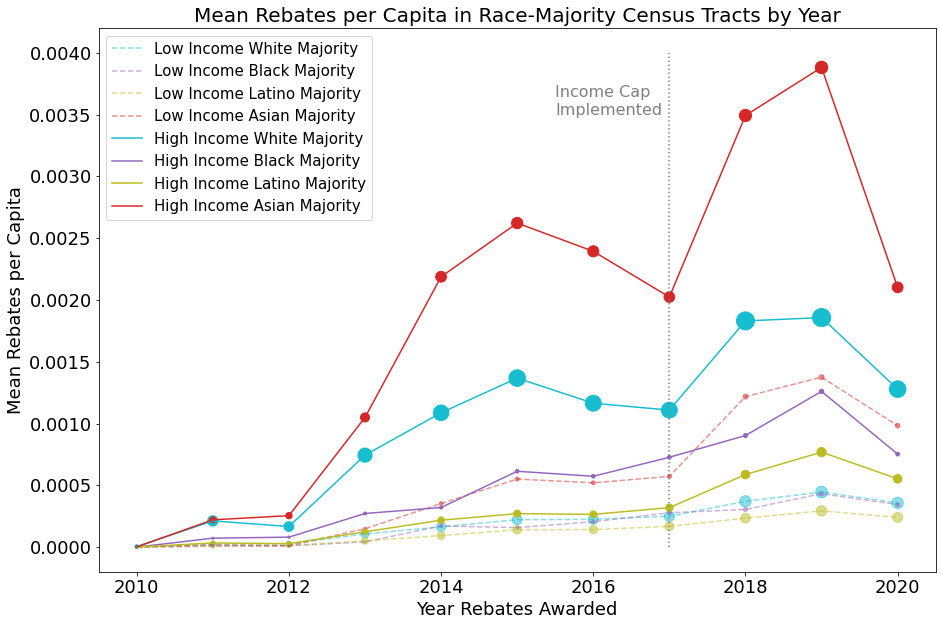

In [46]:
f, ax = plt.subplots(1,1, figsize = (15,10))
ax.vlines(2017, 0, 0.004, linestyle = "dotted", color = "gray")
ax.scatter(BEV_c_timeseries["mean_low"].index,BEV_c_timeseries["mean_low"]["White_pct"], s = np.sqrt(BEV_c_timeseries["n_rebates_low"]["White_pct"].astype(float))*2, color = "tab:cyan", alpha = 0.5)
ax.scatter(BEV_c_timeseries["mean_low"].index,BEV_c_timeseries["mean_low"]["Black_pct"], s = np.sqrt(BEV_c_timeseries["n_rebates_low"]["Black_pct"].astype(float))*2, alpha = 0.5, color = "tab:purple")
ax.scatter(BEV_c_timeseries["mean_low"].index,BEV_c_timeseries["mean_low"]["Latino_pct"], s = np.sqrt(BEV_c_timeseries["n_rebates_low"]["Latino_pct"].astype(float))*2, alpha = 0.5, color = "tab:olive")
ax.scatter(BEV_c_timeseries["mean_low"].index,BEV_c_timeseries["mean_low"]["Asian_pct"], s = np.sqrt(BEV_c_timeseries["n_rebates_low"]["Asian_pct"].astype(float)), alpha = 0.5, color = "tab:red")

ax.scatter(BEV_c_timeseries["mean_high"].index,BEV_c_timeseries["mean_high"]["White_pct"], s = np.sqrt(BEV_c_timeseries["n_rebates_high"]["White_pct"].astype(float))*2, color = "tab:cyan")
ax.scatter(BEV_c_timeseries["mean_high"].index,BEV_c_timeseries["mean_high"]["Black_pct"], s = np.sqrt(BEV_c_timeseries["n_rebates_high"]["Black_pct"].astype(float))*2, color = "tab:purple")
ax.scatter(BEV_c_timeseries["mean_high"].index,BEV_c_timeseries["mean_high"]["Latino_pct"], s = np.sqrt(BEV_c_timeseries["n_rebates_high"]["Latino_pct"].astype(float))*2, color = "tab:olive")
ax.scatter(BEV_c_timeseries["mean_high"].index,BEV_c_timeseries["mean_high"]["Asian_pct"], s = np.sqrt(BEV_c_timeseries["n_rebates_high"]["Asian_pct"].astype(float))*2, color = "tab:red")

ax.plot(BEV_c_timeseries["mean_low"].index,BEV_c_timeseries["mean_low"]["White_pct"], color = "tab:cyan", alpha = 0.5, linestyle = "dashed", label = "Low Income White Majority")
ax.plot(BEV_c_timeseries["mean_low"].index,BEV_c_timeseries["mean_low"]["Black_pct"], alpha = 0.5, color = "tab:purple", linestyle = "dashed", label = "Low Income Black Majority")
ax.plot(BEV_c_timeseries["mean_low"].index,BEV_c_timeseries["mean_low"]["Latino_pct"], alpha = 0.5, color = "tab:olive", linestyle = "dashed", label = "Low Income Latino Majority")
ax.plot(BEV_c_timeseries["mean_low"].index,BEV_c_timeseries["mean_low"]["Asian_pct"],  alpha = 0.5, color = "tab:red", linestyle = "dashed", label = "Low Income Asian Majority")

ax.plot(BEV_c_timeseries["mean_high"].index,BEV_c_timeseries["mean_high"]["White_pct"], color = "tab:cyan", label = "High Income White Majority")
ax.plot(BEV_c_timeseries["mean_high"].index,BEV_c_timeseries["mean_high"]["Black_pct"],  color = "tab:purple", label = "High Income Black Majority")
ax.plot(BEV_c_timeseries["mean_high"].index,BEV_c_timeseries["mean_high"]["Latino_pct"], color = "tab:olive", label = "High Income Latino Majority")
ax.plot(BEV_c_timeseries["mean_high"].index,BEV_c_timeseries["mean_high"]["Asian_pct"], color = "tab:red", label = "High Income Asian Majority")

ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)



ax.legend(fontsize = 15)
ax.set_xlabel("Year Rebates Awarded", fontsize = 18)
ax.set_ylabel("Mean Rebates per Capita", fontsize = 18)
ax.set_title("Mean Rebates per Capita in Race-Majority Census Tracts by Year", fontsize = 20)
ax.text(2015.5, 0.0035, "Income Cap \nImplemented", fontsize = 16, color = "gray")

#f.savefig("rebates_c_timeseries.png")

In [47]:
BEV_pct_timeseries = {}
BEV_pct_timeseries["mean_low"] = pd.DataFrame(index = np.arange(2010,2021), columns = ["White_pct","Black_pct","Asian_pct","Latino_pct"])
BEV_pct_timeseries["mean_high"] = pd.DataFrame(index = np.arange(2010,2021), columns = ["White_pct","Black_pct","Asian_pct","Latino_pct"])
BEV_pct_timeseries["median_low"] = pd.DataFrame(index = np.arange(2010,2021), columns = ["White_pct","Black_pct","Asian_pct","Latino_pct"])
BEV_pct_timeseries["median_high"] = pd.DataFrame(index = np.arange(2010,2021), columns = ["White_pct","Black_pct","Asian_pct","Latino_pct"])
BEV_pct_timeseries["n_cars_low"] = pd.DataFrame(index = np.arange(2010,2021), columns = ["White_pct","Black_pct","Asian_pct","Latino_pct"])
BEV_pct_timeseries["n_cars_high"] = pd.DataFrame(index = np.arange(2010,2021), columns = ["White_pct","Black_pct","Asian_pct","Latino_pct"])
for y in BEV_pct_timeseries["mean_low"].index:
    for r in BEV_pct_timeseries["mean_low"].columns:
        med_inc = zip_data["median income"].median()
        BEV_pct_timeseries["mean_low"].loc[y,r] = (zip_data.loc[(zip_data[r]>50) & (zip_data["median income"] < med_inc),f"{y}_Electric_pct"]).mean()
        BEV_pct_timeseries["median_low"].loc[y,r] = (zip_data.loc[(zip_data[r]>50) & (zip_data["median income"] < med_inc),f"{y}_Electric_pct"]).median()
for y in BEV_pct_timeseries["mean_high"].index:
    for r in BEV_pct_timeseries["mean_high"].columns:
        med_inc = zip_data["median income"].median()
        BEV_pct_timeseries["mean_high"].loc[y,r] = (zip_data.loc[(zip_data[r]>50) & (zip_data["median income"] > med_inc),f"{y}_Electric_pct"]).mean() 
        BEV_pct_timeseries["median_high"].loc[y,r] = (zip_data.loc[(zip_data[r]>50) & (zip_data["median income"] > med_inc),f"{y}_Electric_pct"]).median() 
for y in BEV_pct_timeseries["n_cars_low"].index:
    for r in BEV_pct_timeseries["n_cars_low"].columns:
        med_inc = zip_data["median income"].median()
        BEV_pct_timeseries["n_cars_low"].loc[y,r] = (zip_data.loc[(zip_data[r]>50) & (zip_data["median income"] < med_inc),f"{y}_Electric"]).sum()       
for y in BEV_pct_timeseries["n_cars_high"].index:
    for r in BEV_pct_timeseries["n_cars_high"].columns:
        med_inc = zip_data["median income"].median()
        BEV_pct_timeseries["n_cars_high"].loc[y,r] = (zip_data.loc[(zip_data[r]>50) & (zip_data["median income"] > med_inc),f"{y}_Electric"]).sum() 



Text(0.5, 1.0, 'Mean BEV Penetration (%) in Race-Majority ZIP Codes')

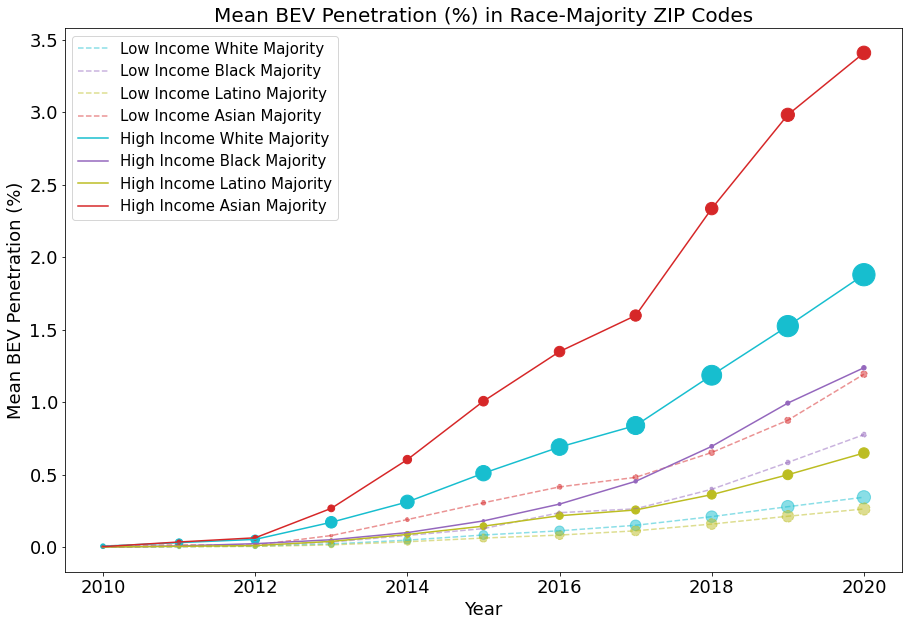

In [48]:
f, ax = plt.subplots(1,1, figsize = (15,10))
ax.plot(BEV_pct_timeseries["mean_low"].index, BEV_pct_timeseries["mean_low"]["White_pct"], label = "Low Income White Majority", color = "tab:cyan", alpha = 0.5, linestyle = "dashed")
ax.plot(BEV_pct_timeseries["mean_low"].index, BEV_pct_timeseries["mean_low"]["Black_pct"], label = "Low Income Black Majority", color = "tab:purple", alpha = 0.5, linestyle = "dashed")
ax.plot(BEV_pct_timeseries["mean_low"].index, BEV_pct_timeseries["mean_low"]["Latino_pct"], label = "Low Income Latino Majority", color = "tab:olive", alpha = 0.5, linestyle = "dashed")
ax.plot(BEV_pct_timeseries["mean_low"].index, BEV_pct_timeseries["mean_low"]["Asian_pct"], label = "Low Income Asian Majority", color = "tab:red", alpha = 0.5, linestyle = "dashed")

ax.plot(BEV_pct_timeseries["mean_high"].index, BEV_pct_timeseries["mean_high"]["White_pct"], label = "High Income White Majority", color = "tab:cyan", alpha = 1)
ax.plot(BEV_pct_timeseries["mean_high"].index, BEV_pct_timeseries["mean_high"]["Black_pct"], label = "High Income Black Majority", color = "tab:purple", alpha = 1)
ax.plot(BEV_pct_timeseries["mean_high"].index, BEV_pct_timeseries["mean_high"]["Latino_pct"], label = "High Income Latino Majority", color = "tab:olive", alpha = 1)
ax.plot(BEV_pct_timeseries["mean_high"].index, BEV_pct_timeseries["mean_high"]["Asian_pct"], label = "High Income Asian Majority", color = "tab:red", alpha = 1)

ax.scatter(BEV_pct_timeseries["mean_low"].index, BEV_pct_timeseries["mean_low"]["White_pct"], color = "tab:cyan", alpha = 0.5, s = np.sqrt(BEV_pct_timeseries["n_cars_low"]["White_pct"].astype(float)) )
ax.scatter(BEV_pct_timeseries["mean_low"].index, BEV_pct_timeseries["mean_low"]["Black_pct"],  color = "tab:purple", alpha = 0.5, linestyle = "dashed", s = np.sqrt(BEV_pct_timeseries["n_cars_low"]["Black_pct"].astype(float)))
ax.scatter(BEV_pct_timeseries["mean_low"].index, BEV_pct_timeseries["mean_low"]["Latino_pct"],  color = "tab:olive", alpha = 0.5, linestyle = "dashed", s = np.sqrt(BEV_pct_timeseries["n_cars_low"]["Latino_pct"].astype(float)))
ax.scatter(BEV_pct_timeseries["mean_low"].index, BEV_pct_timeseries["mean_low"]["Asian_pct"],  color = "tab:red", alpha = 0.5, linestyle = "dashed",s = np.sqrt(BEV_pct_timeseries["n_cars_low"]["Asian_pct"].astype(float)))

ax.scatter(BEV_pct_timeseries["mean_high"].index, BEV_pct_timeseries["mean_high"]["White_pct"], color = "tab:cyan", alpha = 1, s = np.sqrt(BEV_pct_timeseries["n_cars_high"]["White_pct"].astype(float)))
ax.scatter(BEV_pct_timeseries["mean_high"].index, BEV_pct_timeseries["mean_high"]["Black_pct"], color = "tab:purple", alpha = 1, s = np.sqrt(BEV_pct_timeseries["n_cars_high"]["Black_pct"].astype(float)))
ax.scatter(BEV_pct_timeseries["mean_high"].index, BEV_pct_timeseries["mean_high"]["Latino_pct"], color = "tab:olive", alpha = 1, s = np.sqrt(BEV_pct_timeseries["n_cars_high"]["Latino_pct"].astype(float)))
ax.scatter(BEV_pct_timeseries["mean_high"].index, BEV_pct_timeseries["mean_high"]["Asian_pct"], color = "tab:red", alpha = 1, s = np.sqrt(BEV_pct_timeseries["n_cars_high"]["Asian_pct"].astype(float)))

ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)





ax.legend(fontsize = 15)
ax.set_xlabel("Year", fontsize = 18)
ax.set_ylabel("Mean BEV Penetration (%)", fontsize = 18)
ax.set_title("Mean BEV Penetration (%) in Race-Majority ZIP Codes", fontsize = 20)
#f.savefig("bev_pct_timeseries.png")

## Redlining Analysis

In [49]:
rl_rebates = tracts_data[["BEV_rebates_pc","geometry"]].overlay(redlining.to_crs(tracts_data.crs))
rl_rebates["area_calc"] = rl_rebates.geometry.area


/var/folders/vy/0842xjfx7l38y0jjvdqx_6sc0000gn/T/ipykernel_66859/2524281057.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  rl_rebates["area_calc"] = rl_rebates.geometry.area


In [50]:
rl_pct = zip_data[["pct_Battery Electric","geometry"]].overlay(redlining.to_crs(tracts_data.crs))
rl_pct["area_calc"] = rl_pct.geometry.area

/var/folders/vy/0842xjfx7l38y0jjvdqx_6sc0000gn/T/ipykernel_66859/3649896466.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  rl_pct["area_calc"] = rl_pct.geometry.area


In [51]:
def rl_weighted_avg_rebates(df):
    weights = df.area_calc
    values = df.BEV_rebates_pc
    avg = np.average(values, weights = weights)
    return avg

def rl_weighted_avg_pct(df):
    weights = df.area_calc
    values = df["pct_Battery Electric"]
    avg = np.average(values, weights = weights)
    return avg

In [52]:
mean_rebates_c = rl_rebates.groupby("neighborho").apply(rl_weighted_avg_rebates)
mean_rebates_c.name = "rebates_c"

In [53]:
mean_pct_c = rl_pct.groupby("neighborho").apply(rl_weighted_avg_pct)
mean_pct_c.name = "pct_Battery Electric"

In [54]:
rebates_c_neighborhoods = redlining.merge(mean_rebates_c, left_on = "neighborho", right_index = True, how = "right")

In [55]:
pct_bev_c_neighborhoods = redlining.merge(mean_pct_c, left_on = "neighborho", right_index = True, how = "right")

In [56]:
holc_grades = ["A","B","C","D"]
pairs = list(combinations(holc_grades, r=2))

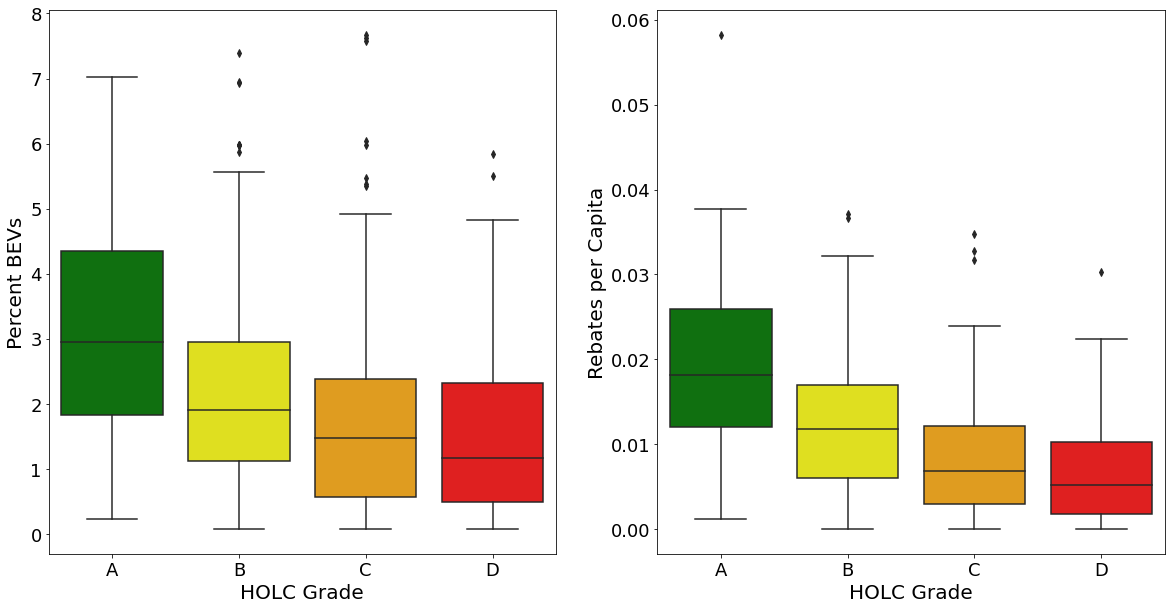

In [57]:
my_pal = ["green","yellow","orange","red"]

f, ax = plt.subplots(1,2, figsize = (20,10))
ax = ax.flatten()

plot = sns.boxplot(x="holc_grade", y="pct_Battery Electric", data=pct_bev_c_neighborhoods, ax = ax[0], palette = my_pal)
#annotator = Annotator(plot, pairs, data = pct_bev_c_neighborhoods, x = "holc_grade", y = "pct_Battery Electric", order = holc_grades)
#annotator.configure(test = "Mann-Whitney")
#annotator.apply_and_annotate()
# ax[0].set_title("BEV Penetration", fontsize = 25)
ax[0].set_ylabel("Percent BEVs", fontsize = 20)
ax[0].set_xlabel("HOLC Grade", fontsize = 20)
ax[0].tick_params(axis='x', labelsize=18)
ax[0].tick_params(axis='y', labelsize=18)

plot = sns.boxplot(x="holc_grade", y="rebates_c", data=rebates_c_neighborhoods, ax = ax[1], palette = my_pal)
#annotator = Annotator(plot, pairs, data = rebates_c_neighborhoods, x = "holc_grade", y = "rebates_c", order = holc_grades)
#annotator.configure(test = "Mann-Whitney")
#annotator.apply_and_annotate()
# ax[1].set_title("Rebates per Capita", fontsize = 25)
ax[1].set_ylabel("Rebates per Capita", fontsize = 20)
ax[1].set_xlabel("HOLC Grade", fontsize = 20)
ax[1].tick_params(axis='x', labelsize=18)
ax[1].tick_params(axis='y', labelsize=18)


#f.savefig("redlining_boxplots_updated.png")



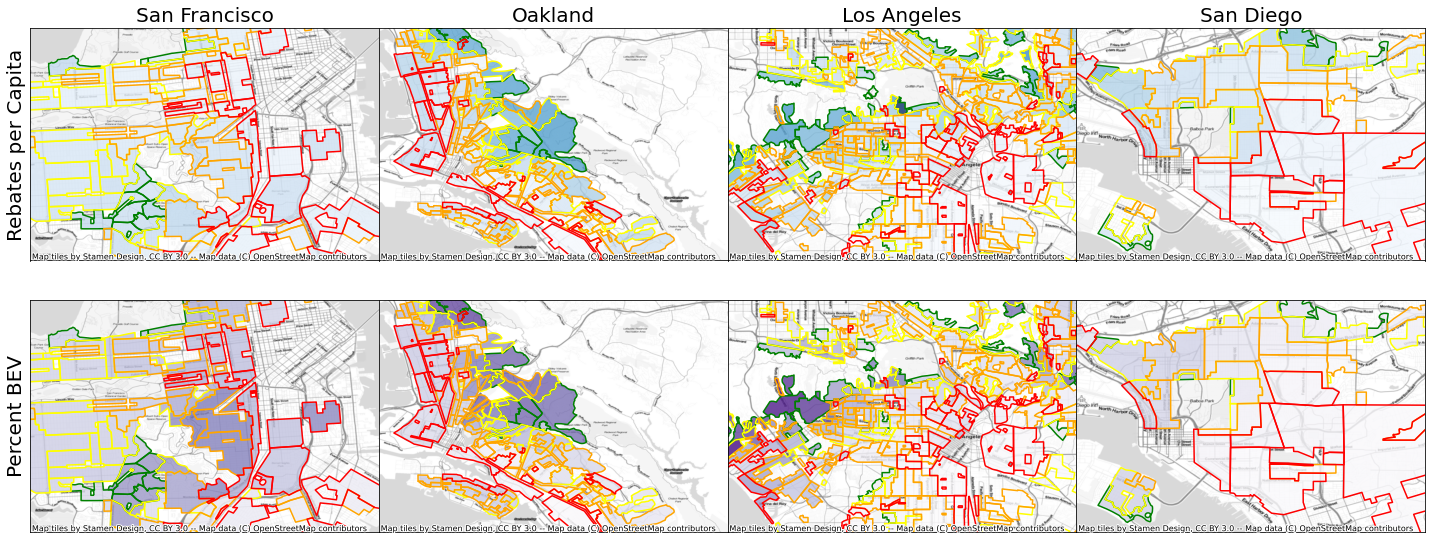

In [58]:
f, ax = plt.subplots(2,4, figsize = (25,10))
ax = ax.flatten()
plt.subplots_adjust(wspace=0, hspace=0)

city = "San Francisco"
rebates_c_neighborhoods.replace([np.inf, -np.inf], 0, inplace=True)
rebates_c_neighborhoods.plot(column = "rebates_c", ax = ax[0], cmap = "Blues", alpha = 0.8)
rebates_c_neighborhoods[(rebates_c_neighborhoods.holc_grade=="A") & (rebates_c_neighborhoods.city==city)].boundary.plot(color = "green", ax = ax[0])
rebates_c_neighborhoods[(rebates_c_neighborhoods.holc_grade=="B") & (rebates_c_neighborhoods.city==city)].boundary.plot(color = "yellow", ax = ax[0])
rebates_c_neighborhoods[(rebates_c_neighborhoods.holc_grade=="C") & (rebates_c_neighborhoods.city==city)].boundary.plot(color = "orange", ax = ax[0])
rebates_c_neighborhoods[(rebates_c_neighborhoods.holc_grade=="D") & (rebates_c_neighborhoods.city==city)].boundary.plot(color = "red", ax = ax[0])
# ctx.add_basemap(ax[0], crs = rebates_c_neighborhoods.crs)
ax[0].set_title("San Francisco", fontsize = 20)
ax[0].set_xlim([-122.5, -122.38])
ax[0].set_ylim([37.72, 37.8])
ax[0].set_ylabel("Rebates per Capita", fontsize = 20)

city = "Oakland"
rebates_c_neighborhoods.replace([np.inf, -np.inf], 0, inplace=True)
rebates_c_neighborhoods.plot(column = "rebates_c", ax = ax[1], cmap = "Blues", alpha = 0.8)
rebates_c_neighborhoods[(rebates_c_neighborhoods.holc_grade=="A") & (rebates_c_neighborhoods.city==city)].boundary.plot(color = "green", ax = ax[1])
rebates_c_neighborhoods[(rebates_c_neighborhoods.holc_grade=="B") & (rebates_c_neighborhoods.city==city)].boundary.plot(color = "yellow", ax = ax[1])
rebates_c_neighborhoods[(rebates_c_neighborhoods.holc_grade=="C") & (rebates_c_neighborhoods.city==city)].boundary.plot(color = "orange", ax = ax[1])
rebates_c_neighborhoods[(rebates_c_neighborhoods.holc_grade=="D") & (rebates_c_neighborhoods.city==city)].boundary.plot(color = "red", ax = ax[1])
# ctx.add_basemap(ax[1], crs = rebates_c_neighborhoods.crs)
ax[1].set_title("Oakland", fontsize = 20)
ax[1].set_xlim([-122.32, -122.08])
ax[1].set_ylim(37.74, 37.9)

city = "Los Angeles"
rebates_c_neighborhoods.replace([np.inf, -np.inf], 0, inplace=True)
rebates_c_neighborhoods.plot(column = "rebates_c", ax = ax[2], cmap = "Blues", alpha = 0.8)
rebates_c_neighborhoods[(rebates_c_neighborhoods.holc_grade=="A") & (rebates_c_neighborhoods.city==city)].boundary.plot(color = "green", ax = ax[2])
rebates_c_neighborhoods[(rebates_c_neighborhoods.holc_grade=="B") & (rebates_c_neighborhoods.city==city)].boundary.plot(color = "yellow", ax = ax[2])
rebates_c_neighborhoods[(rebates_c_neighborhoods.holc_grade=="C") & (rebates_c_neighborhoods.city==city)].boundary.plot(color = "orange", ax = ax[2])
rebates_c_neighborhoods[(rebates_c_neighborhoods.holc_grade=="D") & (rebates_c_neighborhoods.city==city)].boundary.plot(color = "red", ax = ax[2])
# ctx.add_basemap(ax[2], crs = rebates_c_neighborhoods.crs)
ax[2].set_title("Los Angeles", fontsize = 20)
ax[2].set_xlim([-118.5, -118.125])
ax[2].set_ylim(33.95, 34.2)

city = "San Diego"
rebates_c_neighborhoods.replace([np.inf, -np.inf], 0, inplace=True)
rebates_c_neighborhoods.plot(column = "rebates_c", ax = ax[3], cmap = "Blues", alpha = 0.8)
rebates_c_neighborhoods[(rebates_c_neighborhoods.holc_grade=="A") & (rebates_c_neighborhoods.city==city)].boundary.plot(color = "green", ax = ax[3])
rebates_c_neighborhoods[(rebates_c_neighborhoods.holc_grade=="B") & (rebates_c_neighborhoods.city==city)].boundary.plot(color = "yellow", ax = ax[3])
rebates_c_neighborhoods[(rebates_c_neighborhoods.holc_grade=="C") & (rebates_c_neighborhoods.city==city)].boundary.plot(color = "orange", ax = ax[3])
rebates_c_neighborhoods[(rebates_c_neighborhoods.holc_grade=="D") & (rebates_c_neighborhoods.city==city)].boundary.plot(color = "red", ax = ax[3])
# ctx.add_basemap(ax[3], crs = rebates_c_neighborhoods.crs)
ax[3].set_title("San Diego", fontsize = 20)
ax[3].set_xlim([-117.2, -117.05])
ax[3].set_ylim(32.675, 32.775)

#-------------------------------------------------------------------------------------------------
city = "San Francisco"
rebates_c_neighborhoods.replace([np.inf, -np.inf], 0, inplace=True)
pct_bev_c_neighborhoods.plot(column = "pct_Battery Electric", ax = ax[4], cmap = "Purples", alpha = 0.8)
pct_bev_c_neighborhoods[(pct_bev_c_neighborhoods.holc_grade=="A") & (pct_bev_c_neighborhoods.city==city)].boundary.plot(color = "green", ax = ax[4])
pct_bev_c_neighborhoods[(pct_bev_c_neighborhoods.holc_grade=="B") & (pct_bev_c_neighborhoods.city==city)].boundary.plot(color = "yellow", ax = ax[4])
pct_bev_c_neighborhoods[(pct_bev_c_neighborhoods.holc_grade=="C") & (pct_bev_c_neighborhoods.city==city)].boundary.plot(color = "orange", ax = ax[4])
pct_bev_c_neighborhoods[(pct_bev_c_neighborhoods.holc_grade=="D") & (pct_bev_c_neighborhoods.city==city)].boundary.plot(color = "red", ax = ax[4])
# ctx.add_basemap(ax[0], crs = pct_bev_c_neighborhoods.crs)
# ax[4].set_title("San Francisco")
ax[4].set_xlim([-122.5, -122.38])
ax[4].set_ylim([37.72, 37.8])
ax[4].set_ylabel("Percent BEV", fontsize = 20)

city = "Oakland"
pct_bev_c_neighborhoods.replace([np.inf, -np.inf], 0, inplace=True)
pct_bev_c_neighborhoods.plot(column = "pct_Battery Electric", ax = ax[5], cmap = "Purples", alpha = 0.8)
pct_bev_c_neighborhoods[(pct_bev_c_neighborhoods.holc_grade=="A") & (pct_bev_c_neighborhoods.city==city)].boundary.plot(color = "green", ax = ax[5])
pct_bev_c_neighborhoods[(pct_bev_c_neighborhoods.holc_grade=="B") & (pct_bev_c_neighborhoods.city==city)].boundary.plot(color = "yellow", ax = ax[5])
pct_bev_c_neighborhoods[(pct_bev_c_neighborhoods.holc_grade=="C") & (pct_bev_c_neighborhoods.city==city)].boundary.plot(color = "orange", ax = ax[5])
pct_bev_c_neighborhoods[(pct_bev_c_neighborhoods.holc_grade=="D") & (pct_bev_c_neighborhoods.city==city)].boundary.plot(color = "red", ax = ax[5])
# ctx.add_basemap(ax[1], crs = pct_bev_c_neighborhoods.crs)
# ax[5].set_title("Oakland")
ax[5].set_xlim([-122.32, -122.08])
ax[5].set_ylim(37.74, 37.9)

city = "Los Angeles"
pct_bev_c_neighborhoods.replace([np.inf, -np.inf], 0, inplace=True)
pct_bev_c_neighborhoods.plot(column = "pct_Battery Electric", ax = ax[6], cmap = "Purples", alpha = 0.8)
pct_bev_c_neighborhoods[(pct_bev_c_neighborhoods.holc_grade=="A") & (pct_bev_c_neighborhoods.city==city)].boundary.plot(color = "green", ax = ax[6])
pct_bev_c_neighborhoods[(pct_bev_c_neighborhoods.holc_grade=="B") & (pct_bev_c_neighborhoods.city==city)].boundary.plot(color = "yellow", ax = ax[6])
pct_bev_c_neighborhoods[(pct_bev_c_neighborhoods.holc_grade=="C") & (pct_bev_c_neighborhoods.city==city)].boundary.plot(color = "orange", ax = ax[6])
pct_bev_c_neighborhoods[(pct_bev_c_neighborhoods.holc_grade=="D") & (pct_bev_c_neighborhoods.city==city)].boundary.plot(color = "red", ax = ax[6])
# ctx.add_basemap(ax[2], crs = pct_bev_c_neighborhoods.crs)
# ax[6].set_title("Los Angeles")
ax[6].set_xlim([-118.5, -118.125])
ax[6].set_ylim(33.95, 34.2)

city = "San Diego"
pct_bev_c_neighborhoods.replace([np.inf, -np.inf], 0, inplace=True)
pct_bev_c_neighborhoods.plot(column = "pct_Battery Electric", ax = ax[7], cmap = "Purples", alpha = 0.8)
pct_bev_c_neighborhoods[(pct_bev_c_neighborhoods.holc_grade=="A") & (pct_bev_c_neighborhoods.city==city)].boundary.plot(color = "green", ax = ax[7])
pct_bev_c_neighborhoods[(pct_bev_c_neighborhoods.holc_grade=="B") & (pct_bev_c_neighborhoods.city==city)].boundary.plot(color = "yellow", ax = ax[7])
pct_bev_c_neighborhoods[(pct_bev_c_neighborhoods.holc_grade=="C") & (pct_bev_c_neighborhoods.city==city)].boundary.plot(color = "orange", ax = ax[7])
pct_bev_c_neighborhoods[(pct_bev_c_neighborhoods.holc_grade=="D") & (pct_bev_c_neighborhoods.city==city)].boundary.plot(color = "red", ax = ax[7])
# ctx.add_basemap(ax[3], crs = pct_bev_c_neighborhoods.crs)
# ax[7].set_title("San Diego")
ax[7].set_xlim([-117.2, -117.05])
ax[7].set_ylim(32.675, 32.775)


#ctx.add_basemap(ax, crs = pct_bev_c_neighborhoods.crs, source=ctx.providers.Stamen.TonerLite)



for a in ax:
    a.set_xticks([])
    a.set_yticks([])
    ctx.add_basemap(a, crs = pct_bev_c_neighborhoods.crs, source=ctx.providers.Stamen.TonerLite)

#f.savefig("redlining_maps_fig.png")

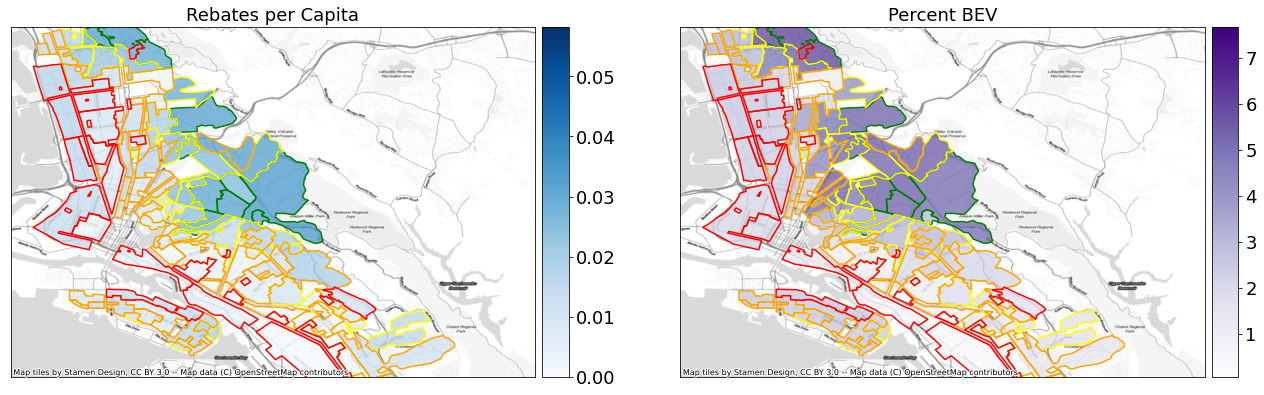

In [59]:
##Just Oakland
f, ax = plt.subplots(1,2, figsize = (22,10))
ax = ax.flatten()
#plt.subplots_adjust(wspace=0, hspace=0)

city = "Oakland"
divider = make_axes_locatable(ax[0])
cax = divider.append_axes("right", size="5%", pad=0.1)
rebates_c_neighborhoods.replace([np.inf, -np.inf], 0, inplace=True)
g = rebates_c_neighborhoods.plot(column = "rebates_c", ax = ax[0], cmap = "Blues", alpha = 0.8, legend = True, cax = cax)
rebates_c_neighborhoods[(rebates_c_neighborhoods.holc_grade=="A") & (rebates_c_neighborhoods.city==city)].boundary.plot(color = "green", ax = ax[0])
rebates_c_neighborhoods[(rebates_c_neighborhoods.holc_grade=="B") & (rebates_c_neighborhoods.city==city)].boundary.plot(color = "yellow", ax = ax[0])
rebates_c_neighborhoods[(rebates_c_neighborhoods.holc_grade=="C") & (rebates_c_neighborhoods.city==city)].boundary.plot(color = "orange", ax = ax[0])
rebates_c_neighborhoods[(rebates_c_neighborhoods.holc_grade=="D") & (rebates_c_neighborhoods.city==city)].boundary.plot(color = "red", ax = ax[0])
# ctx.add_basemap(ax[1], crs = rebates_c_neighborhoods.crs)
ax[0].set_title("Rebates per Capita", fontsize = 18)
ax[0].set_xlim([-122.32, -122.08])
ax[0].set_ylim(37.74, 37.9)
cax.tick_params(labelsize = 18)


city = "Oakland"
divider = make_axes_locatable(ax[1])
cax = divider.append_axes("right", size="5%", pad=0.1)
pct_bev_c_neighborhoods.replace([np.inf, -np.inf], 0, inplace=True)
pct_bev_c_neighborhoods.plot(column = "pct_Battery Electric", ax = ax[1], cmap = "Purples", alpha = 0.8, legend = True, cax = cax)
pct_bev_c_neighborhoods[(pct_bev_c_neighborhoods.holc_grade=="A") & (pct_bev_c_neighborhoods.city==city)].boundary.plot(color = "green", ax = ax[1])
pct_bev_c_neighborhoods[(pct_bev_c_neighborhoods.holc_grade=="B") & (pct_bev_c_neighborhoods.city==city)].boundary.plot(color = "yellow", ax = ax[1])
pct_bev_c_neighborhoods[(pct_bev_c_neighborhoods.holc_grade=="C") & (pct_bev_c_neighborhoods.city==city)].boundary.plot(color = "orange", ax = ax[1])
pct_bev_c_neighborhoods[(pct_bev_c_neighborhoods.holc_grade=="D") & (pct_bev_c_neighborhoods.city==city)].boundary.plot(color = "red", ax = ax[1])
# ctx.add_basemap(ax[1], crs = pct_bev_c_neighborhoods.crs)
ax[1].set_title("Percent BEV", fontsize = 18)
ax[1].set_xlim([-122.32, -122.08])
ax[1].set_ylim(37.74, 37.9)
cax.tick_params(labelsize = 18)

for a in ax:
    a.set_xticks([])
    a.set_yticks([])
    ctx.add_basemap(a, crs = pct_bev_c_neighborhoods.crs, source=ctx.providers.Stamen.TonerLite)
#f.savefig("redlining_maps_fig_basemaps_updated.png")

### Boxplots

In [60]:
tracts_data["majority_race"] = "none"
for row in tracts_data.index:
    if tracts_data.loc[row,"White non-Latino_pct"] >50:
        tracts_data.loc[row,"majority_race"] = "White"
    elif tracts_data.loc[row,"Black non-Latino_pct"] >50:
        tracts_data.loc[row, "majority_race"] = "Black"
    elif tracts_data.loc[row,"Asian non-Latino_pct"] >50:
        tracts_data.loc[row, "majority_race"] = "Asian"
    elif tracts_data.loc[row,"Latino_pct"] >50:
        tracts_data.loc[row, "majority_race"] = "Latino"

In [61]:
median_med_income = tracts_data["median income"].median()
tracts_data["income_class"] = "High Income"
for row in tracts_data.index:
    if tracts_data.loc[row,"median income"] < median_med_income:
        tracts_data.loc[row,"income_class"] = "Low Income"

In [62]:
majority_races = ["White","Black","Asian", "Latino"]
race_pairs = list(combinations(majority_races, r=2))

In [63]:
zip_data["majority_race"] = "none"
for row in zip_data.index:
    if zip_data.loc[row,"White non-Latino_pct"] >50:
        zip_data.loc[row,"majority_race"] = "White"
    elif zip_data.loc[row,"Black non-Latino_pct"] >50:
        zip_data.loc[row, "majority_race"] = "Black"
    elif zip_data.loc[row,"Asian non-Latino_pct"] >50:
        zip_data.loc[row, "majority_race"] = "Asian"
    elif zip_data.loc[row,"Latino_pct"] >50:
        zip_data.loc[row, "majority_race"] = "Latino"

In [64]:
median_med_income = zip_data["median income"].median()
zip_data["income_class"] = "High Income"
for row in zip_data.index:
    if zip_data.loc[row,"median income"] < median_med_income:
        zip_data.loc[row,"income_class"] = "Low Income"

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

White vs. Black: Mann-Whitney-Wilcoxon test two-sided, P_val:2.502e-04 U_stat=2.154e+04
Black vs. Asian: Mann-Whitney-Wilcoxon test two-sided, P_val:5.083e-07 U_stat=3.080e+02
Asian vs. Latino: Mann-Whitney-Wilcoxon test two-sided, P_val:2.536e-91 U_stat=1.138e+05
White vs. Asian: Mann-Whitney-Wilcoxon test two-sided, P_val:4.521e-25 U_stat=1.736e+05
Black vs. Latino: Mann-Whitney-Wilcoxon test two-sided, P_val:4.191e-03 U_stat=4.202e+03
White vs. Latino: Mann-Whitney-Wilcoxon test two-sided, P_val:2.431e-142 U_stat=8.136e+05
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

White vs. Black: Mann-Whitney-Wilcoxon test two-sided, P_val:3.189e-02 U_stat=2.456e+04
Black vs. Asian: M

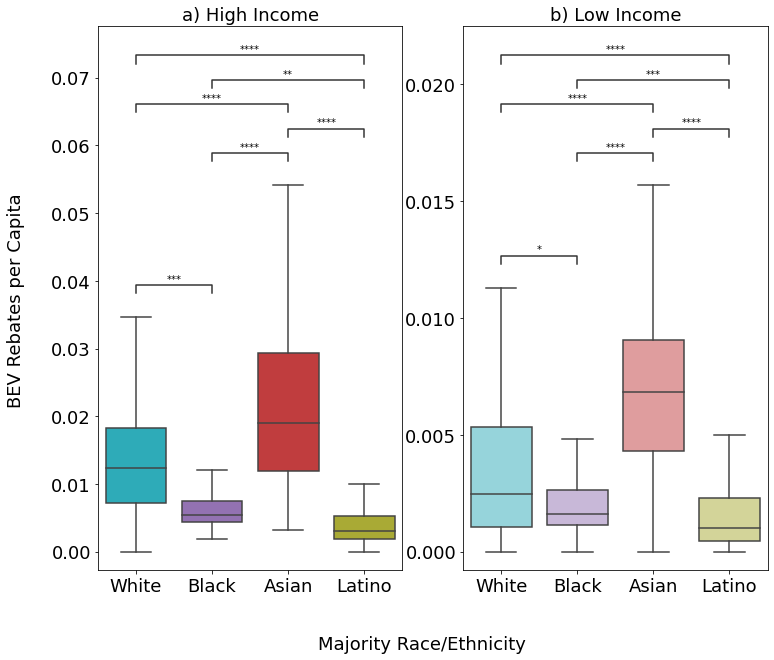

In [65]:
colors = ["tab:cyan", "tab:purple","tab:red", "tab:olive"]

f, ax = plt.subplots(1,2, figsize = (12,10))
ax = ax.flatten()
plot = sns.boxplot(x="majority_race", y="BEV_rebates_pc", palette = colors, data=tracts_data[(tracts_data.majority_race != "none") & (tracts_data.income_class == "High Income")], ax = ax[0], showfliers = False, order = majority_races)
annotator = Annotator(plot, race_pairs, data = tracts_data[(tracts_data.majority_race != "none") & (tracts_data.income_class == "High Income")], x = "majority_race", y = "BEV_rebates_pc", order = majority_races)
annotator.configure(test = "Mann-Whitney")
annotator.apply_and_annotate()
ax[0].set_title("a) High Income", fontsize = 18)
f.supylabel("BEV Rebates per Capita", fontsize = 18)
f.supxlabel("Majority Race/Ethnicity", fontsize = 18)

plot = sns.boxplot(x="majority_race", y="BEV_rebates_pc", palette = colors, data=tracts_data[(tracts_data.majority_race != "none") & (tracts_data.income_class == "Low Income")], ax = ax[1], showfliers = False, order = majority_races)
annotator = Annotator(plot, race_pairs, data = tracts_data[(tracts_data.majority_race != "none") & (tracts_data.income_class == "Low Income")], x = "majority_race", y = "BEV_rebates_pc", order = majority_races)
annotator.configure(test = "Mann-Whitney")
annotator.apply_and_annotate()
ax[1].set_title("b) Low Income", fontsize = 18)

for patch in ax[1].patches:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .5))


for a in ax:
    #a.set_ylim([0,0.06])
    a.set_ylabel("")
    a.set_xlabel("")
    a.tick_params(axis='x', labelsize=18)
    a.tick_params(axis='y', labelsize=18)
    
#f.savefig("rebates_boxplots_high_low.png")

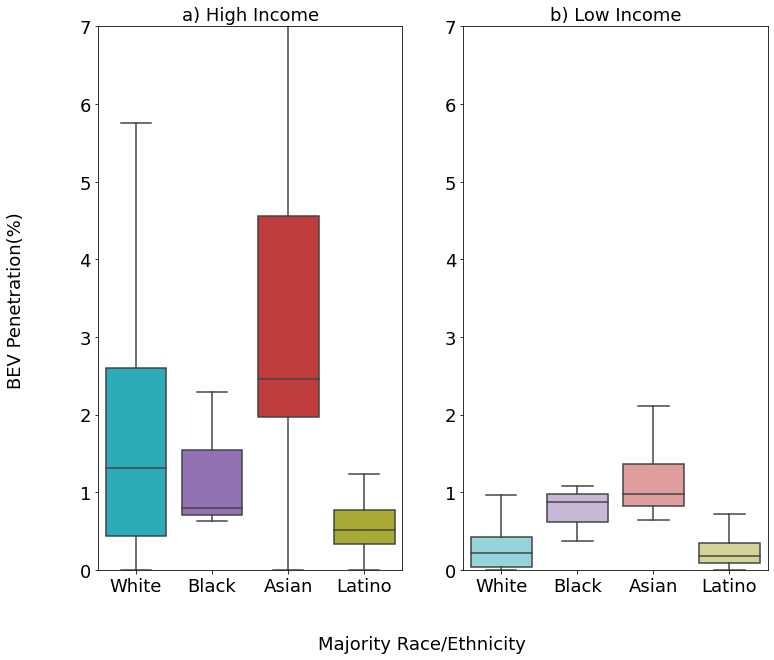

In [66]:
colors = ["tab:cyan", "tab:purple","tab:red", "tab:olive"]

f, ax = plt.subplots(1,2, figsize = (12,10))
ax = ax.flatten()
plot = sns.boxplot(x="majority_race", y="pct_Battery Electric", palette = colors, data=zip_data[(zip_data.majority_race != "none") & (zip_data.income_class == "High Income")], ax = ax[0], showfliers = False, order = majority_races)
#annotator = Annotator(plot, race_pairs, data = tracts_data[(tracts_data.majority_race != "none") & (tracts_data.income_class == "High Income")], x = "majority_race", y = "BEV_rebates_pc", order = majority_races)
#annotator.configure(test = "Mann-Whitney")
#annotator.apply_and_annotate()
ax[0].set_title("a) High Income", fontsize = 18)
f.supylabel("BEV Penetration(%)", fontsize = 18)
f.supxlabel("Majority Race/Ethnicity", fontsize = 18)

plot = sns.boxplot(x="majority_race", y="pct_Battery Electric", palette = colors, data=zip_data[(zip_data.majority_race != "none") & (zip_data.income_class == "Low Income")], ax = ax[1], showfliers = False, order = majority_races)
#annotator = Annotator(plot, race_pairs, data = tracts_data[(tracts_data.majority_race != "none") & (tracts_data.income_class == "Low Income")], x = "majority_race", y = "BEV_rebates_pc", order = majority_races)
#annotator.configure(test = "Mann-Whitney")
#annotator.apply_and_annotate()
ax[1].set_title("b) Low Income", fontsize = 18)

for patch in ax[1].patches:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .5))


for a in ax:
    a.set_ylim([0,7])
    a.set_ylabel("")
    a.set_xlabel("")
    a.tick_params(axis='x', labelsize=18)
    a.tick_params(axis='y', labelsize=18)
    
#f.savefig("BEV_pct_boxplots_high_low_updated.png")

### Heatmaps

In [67]:
rebates_heatmap = pd.DataFrame(index = ["Black non-Latino_pct", "White non-Latino_pct", "Asian non-Latino_pct","Latino_pct"], 
                              columns = [f"{i}-{i+10000}" for i in range(0, 250000, 10000)], dtype = float)

In [68]:
for r in rebates_heatmap.index:
    for c in rebates_heatmap.columns:
        lb, ub = c.split("-")
        lb = int(lb)
        ub = int(ub)
        rebates_heatmap.loc[r,c] = tracts_data.loc[(tracts_data[r]>50) & (tracts_data["median income"] > lb) & (tracts_data["median income"] < ub), "BEV_rebates_pc"].mean()
        
rebates_heatmap.index = ["Black", "White", "Asian","Latino"]
rebates_heatmap.columns = [f"${i}-{i+10}k" for i in range(0, 250, 10)]
        
  

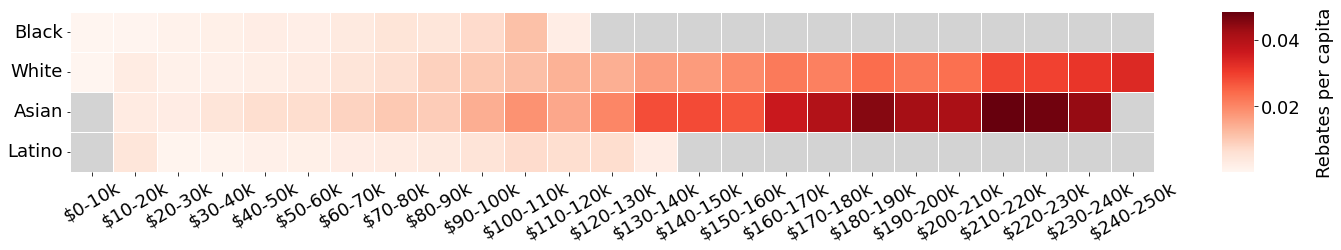

In [69]:
f, ax = plt.subplots(1,1, figsize = (20,3.5))
divider = make_axes_locatable(ax)
# cax = divider.append_axes("right", size="5%", pad=0.1)
g = sns.heatmap(rebates_heatmap, cmap = "Reds", ax = ax,linewidths=.5, cbar_kws = {"aspect":5})
g.set_facecolor("lightgray")
plt.xticks(rotation = 30)
plt.yticks(rotation = 360)
cb = g.collections[0].colorbar
cb.set_label("Rebates per capita", labelpad=15, fontsize = 18)

ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)
cb.ax.tick_params(labelsize=18)
plt.tight_layout()
#f.savefig("rebates_heatmap.png")

In [70]:
bev_pct_heatmap = pd.DataFrame(index = ["Black non-Latino_pct", "White non-Latino_pct", "Asian non-Latino_pct","Latino_pct"], 
                              columns = [f"{i}-{i+10000}" for i in range(0, 250000, 10000)], dtype = float)

In [71]:
for r in bev_pct_heatmap.index:
    for c in bev_pct_heatmap.columns:
        lb, ub = c.split("-")
        lb = int(lb)
        ub = int(ub)
        bev_pct_heatmap.loc[r,c] = zip_data.loc[(zip_data[r]>50) & (zip_data["median income"] > lb) & (zip_data["median income"] < ub), "pct_Battery Electric"].mean()
        
bev_pct_heatmap.index = ["Black", "White", "Asian","Latino"]
bev_pct_heatmap.columns = [f"${i}-{i+10}k" for i in range(0, 250, 10)]
        
        

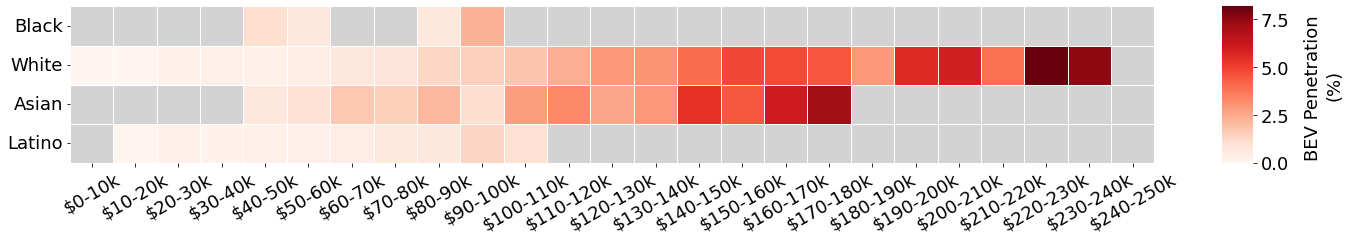

In [72]:
f, ax = plt.subplots(1,1, figsize = (20,3.5))
g = sns.heatmap(bev_pct_heatmap, cmap = "Reds", ax = ax,linewidths=.5, cbar_kws = {"aspect":5})#, cbar_kws = {"shrink":1.1})
g.set_facecolor("lightgray")
plt.xticks(rotation = 30)
cb = g.collections[0].colorbar
cb.set_label("BEV Penetration \n(%)", labelpad=15, fontsize = 18)
plt.yticks(rotation = 360)
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)
cb.ax.tick_params(labelsize=18)


plt.tight_layout()
#f.savefig("bev_pct_heatmap.png")